In [231]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
df = pd.read_csv('data.csv',index_col='Cost Rank')
df.head()


Product Name Product Life Cycle  FY20 Q4   FY21 Q1   FY21 Q2  \
Cost Rank                                                                   
1                ROUTER 1         Sustaining      NaN       NaN       NaN   
2             TRANSCIEVER         Sustaining  87173.0  102849.0  126375.0   
3                SWITCH 1         Sustaining      NaN       NaN       NaN   
4          ACCESS POINT 1         Sustaining      NaN       NaN       NaN   
5          ACCESS POINT 2         Sustaining      NaN       NaN       NaN   

            FY21 Q3   FY21 Q4   FY22 Q1   FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  \
Cost Rank                                                                       
1             906.0     941.0     663.0     769.0    3565.0     1020     1670   
2          128629.0  179125.0  138750.0  208760.0  116126.0   150803    82163   
3            3651.0   10409.0   10575.0   17934.0   15104.0    15525     6938   
4               NaN       NaN       NaN    9576.0   46029.0   109452    54955   
5               NaN       NaN       NaN       NaN       NaN    26769    33670   

           FY23 Q2  FY23 Q3 FY23Q4 Demand FYQ23 Q4 Marketing FY23 Q4 Stats/ML  
Cost Rank                                                                      
1               38     2141         1,716              1,716            1,948  
2            82408    67132        85,000            141,285           97,995  
3             9595     9231        12,000             11,820           11,184  
4            60478    62708        62,771             79,113           65,310  
5            74853    80944        76,192            113,704           93,200

In [233]:
df = df.drop(['FY23Q4 Demand','FYQ23 Q4 Marketing','FY23 Q4 Stats/ML'],axis=1)
df.head()

Product Name Product Life Cycle  FY20 Q4   FY21 Q1   FY21 Q2  \
Cost Rank                                                                   
1                ROUTER 1         Sustaining      NaN       NaN       NaN   
2             TRANSCIEVER         Sustaining  87173.0  102849.0  126375.0   
3                SWITCH 1         Sustaining      NaN       NaN       NaN   
4          ACCESS POINT 1         Sustaining      NaN       NaN       NaN   
5          ACCESS POINT 2         Sustaining      NaN       NaN       NaN   

            FY21 Q3   FY21 Q4   FY22 Q1   FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  \
Cost Rank                                                                       
1             906.0     941.0     663.0     769.0    3565.0     1020     1670   
2          128629.0  179125.0  138750.0  208760.0  116126.0   150803    82163   
3            3651.0   10409.0   10575.0   17934.0   15104.0    15525     6938   
4               NaN       NaN       NaN    9576.0   46029.0   109452    54955   
5               NaN       NaN       NaN       NaN       NaN    26769    33670   

           FY23 Q2  FY23 Q3  
Cost Rank                    
1               38     2141  
2            82408    67132  
3             9595     9231  
4            60478    62708  
5            74853    80944

In [234]:
print(df.isna().sum())

Product Name          0
Product Life Cycle    0
FY20 Q4               9
FY21 Q1               9
FY21 Q2               9
FY21 Q3               6
FY21 Q4               6
FY22 Q1               6
FY22 Q2               3
FY22 Q3               3
FY22 Q4               0
FY23 Q1               0
FY23 Q2               0
FY23 Q3               0
dtype: int64


In [235]:
print(df['Product Name'].value_counts())

Product Name
ROUTER 1               1
TRANSCIEVER            1
SWITCH 10              1
ACCESS POINT 4         1
SWITCH 9               1
SWITCH 8               1
WIRELESS CONTROLLER    1
SWITCH 7               1
SUPERVISOR ENGINE      1
ACCESS POINT 3         1
SWITCH 6               1
SWITCH 5               1
SWITCH 4               1
POWER SUPPLY 1         1
SWITCH 3               1
SWITCH 2               1
ACCESS POINT 2         1
ACCESS POINT 1         1
SWITCH 1               1
POWER SUPPLY 2         1
Name: count, dtype: int64


In [236]:
prdName = df['Product Name']
prdName

Cost Rank
1                ROUTER 1
2             TRANSCIEVER
3                SWITCH 1
4          ACCESS POINT 1
5          ACCESS POINT 2
6                SWITCH 2
7                SWITCH 3
8          POWER SUPPLY 1
9                SWITCH 4
10               SWITCH 5
11               SWITCH 6
12         ACCESS POINT 3
13      SUPERVISOR ENGINE
14               SWITCH 7
15    WIRELESS CONTROLLER
16               SWITCH 8
17               SWITCH 9
18         ACCESS POINT 4
19              SWITCH 10
20         POWER SUPPLY 2
Name: Product Name, dtype: object

In [237]:
df = df.drop(columns=['Product Life Cycle','Product Name'],axis=1)
df

FY20 Q4   FY21 Q1   FY21 Q2   FY21 Q3   FY21 Q4   FY22 Q1  \
Cost Rank                                                               
1               NaN       NaN       NaN     906.0     941.0     663.0   
2           87173.0  102849.0  126375.0  128629.0  179125.0  138750.0   
3               NaN       NaN       NaN    3651.0   10409.0   10575.0   
4               NaN       NaN       NaN       NaN       NaN       NaN   
5               NaN       NaN       NaN       NaN       NaN       NaN   
6           13432.0   12463.0   13452.0   14581.0   15831.0   13864.0   
7           28585.0   19686.0   44724.0   37781.0   31905.0   37888.0   
8          115709.0   98337.0  147681.0  185327.0  194170.0  220386.0   
9               NaN       NaN       NaN     177.0     270.0     850.0   
10           4571.0    4100.0    4830.0    5472.0    7391.0    7894.0   
11              NaN       NaN       NaN       NaN       NaN       NaN   
12          65048.0   67810.0   90928.0  148547.0  228945.0  204184.0   
13              NaN       NaN       NaN       NaN       NaN       NaN   
14           6073.0    5459.0    6736.0   12213.0   13883.0   27045.0   
15           1208.0     963.0    1698.0    1833.0    2423.0    2602.0   
16              4.0      -4.0      36.0     305.0    1093.0    2360.0   
17           6187.0    5301.0    7172.0    7582.0   10964.0   11501.0   
18              NaN       NaN       NaN       NaN       NaN       NaN   
19              NaN       NaN       NaN       NaN       NaN       NaN   
20          28279.0   22704.0   24098.0   31461.0   47009.0   35145.0   

            FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  FY23 Q2  FY23 Q3  
Cost Rank                                                          
1             769.0    3565.0     1020     1670       38     2141  
2          208760.0  116126.0   150803    82163    82408    67132  
3           17934.0   15104.0    15525     6938     9595     9231  
4            9576.0   46029.0   109452    54955    60478    62708  
5               NaN       NaN    26769    33670    74853    80944  
6           15012.0   11349.0    10422     8726    10185     8645  
7           32689.0   30442.0    27028    21246    21149    10584  
8          204604.0  194538.0   185160   147284   136997   100623  
9            2717.0    3833.0     4279     6089     8063     2535  
10           7101.0    6943.0     6126     4616     4680     4397  
11            222.0    1549.0     4619     4764     5015     6656  
12         245453.0  245803.0   136283    76020    51586    53431  
13             15.0     108.0     1972     2427     2841     2096  
14          15162.0   13855.0    12351     8933     5909     6643  
15           2341.0    1830.0     1567     1210     1659     1311  
16           4317.0    4343.0     4094     2756     3126     2808  
17          14980.0    9158.0    11601     3788     5338     5595  
18              NaN       NaN    13260    21667    30498    40505  
19              NaN       NaN     1227    24186     7680    16772  
20          45978.0   34518.0    40605    26925    23635    17799

In [238]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df)
df.loc[:,:] = imputed
df

C:\Users\rsurs\AppData\Roaming\Python\Python310\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


FY20 Q4        FY21 Q1        FY21 Q2        FY21 Q3  \
Cost Rank                                                               
1            2307.073746     451.956724    -576.981064     906.000000   
2           87173.000000  102849.000000  126375.000000  128629.000000   
3            3824.325064    3461.835605    -776.034739    3651.000000   
4           -4035.575509  -44021.250467  -62045.895841   -1640.390947   
5           63257.004944   94777.073448   87290.971665   82405.406778   
6           13432.000000   12463.000000   13452.000000   14581.000000   
7           28585.000000   19686.000000   44724.000000   37781.000000   
8          115709.000000   98337.000000  147681.000000  185327.000000   
9            4942.847567    2502.008906    2979.466201     177.000000   
10           4571.000000    4100.000000    4830.000000    5472.000000   
11          23487.186368   15448.778663   43287.567757   33621.053407   
12          65048.000000   67810.000000   90928.000000  148547.000000   
13          24054.962300   15114.888405   48629.544593   33661.071086   
14           6073.000000    5459.000000    6736.000000   12213.000000   
15           1208.000000     963.000000    1698.000000    1833.000000   
16              4.000000      -4.000000      36.000000     305.000000   
17           6187.000000    5301.000000    7172.000000    7582.000000   
18          38878.657868   59241.055979   51525.626625   58629.425853   
19          31164.206621   44086.932198   38498.938639   54931.981673   
20          28279.000000   22704.000000   24098.000000   31461.000000   

                 FY21 Q4        FY22 Q1        FY22 Q2        FY22 Q3  \
Cost Rank                                                               
1             941.000000     663.000000     769.000000    3565.000000   
2          179125.000000  138750.000000  208760.000000  116126.000000   
3           10409.000000   10575.000000   17934.000000   15104.000000   
4          -11509.053544   48194.382201    9576.000000   46029.000000   
5           32969.991527   44450.306703   34926.499517   -9199.103099   
6           15831.000000   13864.000000   15012.000000   11349.000000   
7           31905.000000   37888.000000   32689.000000   30442.000000   
8          194170.000000  220386.000000  204604.000000  194538.000000   
9             270.000000     850.000000    2717.000000    3833.000000   
10           7391.000000    7894.000000    7101.000000    6943.000000   
11           9448.744654   19185.732376     222.000000    1549.000000   
12         228945.000000  204184.000000  245453.000000  245803.000000   
13           8663.094087   17686.899331      15.000000     108.000000   
14          13883.000000   27045.000000   15162.000000   13855.000000   
15           2423.000000    2602.000000    2341.000000    1830.000000   
16           1093.000000    2360.000000    4317.000000    4343.000000   
17          10964.000000   11501.000000   14980.000000    9158.000000   
18          47552.985370   41875.615493   39757.913165   20803.518088   
19          63058.327989   49799.319509   41181.481528   46457.190883   
20          47009.000000   35145.000000   45978.000000   34518.000000   

           FY22 Q4  FY23 Q1  FY23 Q2  FY23 Q3  
Cost Rank                                      
1             1020     1670       38     2141  
2           150803    82163    82408    67132  
3            15525     6938     9595     9231  
4           109452    54955    60478    62708  
5            26769    33670    74853    80944  
6            10422     8726    10185     8645  
7            27028    21246    21149    10584  
8           185160   147284   136997   100623  
9             4279     6089     8063     2535  
10            6126     4616     4680     4397  
11            4619     4764     5015     6656  
12          136283    76020    51586    53431  
13            1972     2427     2841     2096  
14           12351     8933     5909     6643  
15            1567     1210     165

In [239]:
new_df = df.copy()
new_df['Product Name'] = prdName
new_df.head()

FY20 Q4        FY21 Q1        FY21 Q2        FY21 Q3  \
Cost Rank                                                              
1           2307.073746     451.956724    -576.981064     906.000000   
2          87173.000000  102849.000000  126375.000000  128629.000000   
3           3824.325064    3461.835605    -776.034739    3651.000000   
4          -4035.575509  -44021.250467  -62045.895841   -1640.390947   
5          63257.004944   94777.073448   87290.971665   82405.406778   

                 FY21 Q4        FY22 Q1        FY22 Q2        FY22 Q3  \
Cost Rank                                                               
1             941.000000     663.000000     769.000000    3565.000000   
2          179125.000000  138750.000000  208760.000000  116126.000000   
3           10409.000000   10575.000000   17934.000000   15104.000000   
4          -11509.053544   48194.382201    9576.000000   46029.000000   
5           32969.991527   44450.306703   34926.499517   -9199.103099   

           FY22 Q4  FY23 Q1  FY23 Q2  FY23 Q3    Product Name  
Cost Rank                                                      
1             1020     1670       38     2141        ROUTER 1  
2           150803    82163    82408    67132     TRANSCIEVER  
3            15525     6938     9595     9231        SWITCH 1  
4           109452    54955    60478    62708  ACCESS POINT 1  
5            26769    33670    74853    80944  ACCESS POINT 2

In [242]:
new_df.index = new_df["Product Name"]
new_df = new_df.drop('Product Name',axis=1)
new_df

FY20 Q4        FY21 Q1        FY21 Q2  \
Product Name                                                       
ROUTER 1               2307.073746     451.956724    -576.981064   
TRANSCIEVER           87173.000000  102849.000000  126375.000000   
SWITCH 1               3824.325064    3461.835605    -776.034739   
ACCESS POINT 1        -4035.575509  -44021.250467  -62045.895841   
ACCESS POINT 2        63257.004944   94777.073448   87290.971665   
SWITCH 2              13432.000000   12463.000000   13452.000000   
SWITCH 3              28585.000000   19686.000000   44724.000000   
POWER SUPPLY 1       115709.000000   98337.000000  147681.000000   
SWITCH 4               4942.847567    2502.008906    2979.466201   
SWITCH 5               4571.000000    4100.000000    4830.000000   
SWITCH 6              23487.186368   15448.778663   43287.567757   
ACCESS POINT 3        65048.000000   67810.000000   90928.000000   
SUPERVISOR ENGINE     24054.962300   15114.888405   48629.544593   
SWITCH 7               6073.000000    5459.000000    6736.000000   
WIRELESS CONTROLLER    1208.000000     963.000000    1698.000000   
SWITCH 8                  4.000000      -4.000000      36.000000   
SWITCH 9               6187.000000    5301.000000    7172.000000   
ACCESS POINT 4        38878.657868   59241.055979   51525.626625   
SWITCH 10             31164.206621   44086.932198   38498.938639   
POWER SUPPLY 2        28279.000000   22704.000000   24098.000000   

                           FY21 Q3        FY21 Q4        FY22 Q1  \
Product Name                                                       
ROUTER 1                906.000000     941.000000     663.000000   
TRANSCIEVER          128629.000000  179125.000000  138750.000000   
SWITCH 1               3651.000000   10409.000000   10575.000000   
ACCESS POINT 1        -1640.390947  -11509.053544   48194.382201   
ACCESS POINT 2        82405.406778   32969.991527   44450.306703   
SWITCH 2              14581.000000   15831.000000   13864.000000   
SWITCH 3              37781.000000   31905.000000   37888.000000   
POWER SUPPLY 1       185327.000000  194170.000000  220386.000000   
SWITCH 4                177.000000     270.000000     850.000000   
SWITCH 5               5472.000000    7391.000000    7894.000000   
SWITCH 6              33621.053407    9448.744654   19185.732376   
ACCESS POINT 3       148547.000000  228945.000000  204184.000000   
SUPERVISOR ENGINE     33661.071086    8663.094087   17686.899331   
SWITCH 7              12213.000000   13883.000000   27045.000000   
WIRELESS CONTROLLER    1833.000000    2423.000000    2602.000000   
SWITCH 8                305.000000    1093.000000    2360.000000   
SWITCH 9               7582.000000   10964.000000   11501.000000   
ACCESS POINT 4        58629.425853   47552.985370   41875.615493   
SWITCH 10             54931.981673   63058.327989   49799.319509   
POWER SUPPLY 2        31461.000000   47009.000000   35145.000000   

                           FY22 Q2        FY22 Q3  FY22 Q4  FY23 Q1  FY23 Q2  \
Product Name                                                                   
ROUTER 1                769.000000    3565.000000     1020     1670       38   
TRANSCIEVER          208760.000000  116126.000000   150803    82163    82408   
SWITCH 1              17934.000000   15104.000000    15525     6938     9595   
ACCESS POINT 1         9576.000000   46029.000000   109452    54955    60478   
ACCESS POINT 2        34926.499517   -9199.103099    26769    33670    74853   
SWITCH 2              15012.000000   11349.000000    10422     8726    10185   
SWITCH 3              32689.000000   30442.000000    27028    21246    21149   
POWER SUPPLY 1       204604.000000  194538.000000   185160   147284   136997   
SWITCH 4               2717.000000    3833.000000     4279     6089     8063   
SWITCH 5               7101.000000    6943.000000     6126     4616     4680   
SWITCH 6                222.000000    1549.000000     4619     4764     5

In [246]:
new_df = new_df.transpose()
new_df

Product Name     ROUTER 1  TRANSCIEVER      SWITCH 1  ACCESS POINT 1  \
FY20 Q4       2307.073746      87173.0   3824.325064    -4035.575509   
FY21 Q1        451.956724     102849.0   3461.835605   -44021.250467   
FY21 Q2       -576.981064     126375.0   -776.034739   -62045.895841   
FY21 Q3        906.000000     128629.0   3651.000000    -1640.390947   
FY21 Q4        941.000000     179125.0  10409.000000   -11509.053544   
FY22 Q1        663.000000     138750.0  10575.000000    48194.382201   
FY22 Q2        769.000000     208760.0  17934.000000     9576.000000   
FY22 Q3       3565.000000     116126.0  15104.000000    46029.000000   
FY22 Q4       1020.000000     150803.0  15525.000000   109452.000000   
FY23 Q1       1670.000000      82163.0   6938.000000    54955.000000   
FY23 Q2         38.000000      82408.0   9595.000000    60478.000000   
FY23 Q3       2141.000000      67132.0   9231.000000    62708.000000   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1     SWITCH 4  \
FY20 Q4         63257.004944   13432.0   28585.0        115709.0  4942.847567   
FY21 Q1         94777.073448   12463.0   19686.0         98337.0  2502.008906   
FY21 Q2         87290.971665   13452.0   44724.0        147681.0  2979.466201   
FY21 Q3         82405.406778   14581.0   37781.0        185327.0   177.000000   
FY21 Q4         32969.991527   15831.0   31905.0        194170.0   270.000000   
FY22 Q1         44450.306703   13864.0   37888.0        220386.0   850.000000   
FY22 Q2         34926.499517   15012.0   32689.0        204604.0  2717.000000   
FY22 Q3         -9199.103099   11349.0   30442.0        194538.0  3833.000000   
FY22 Q4         26769.000000   10422.0   27028.0        185160.0  4279.000000   
FY23 Q1         33670.000000    8726.0   21246.0        147284.0  6089.000000   
FY23 Q2         74853.000000   10185.0   21149.0        136997.0  8063.000000   
FY23 Q3         80944.000000    8645.0   10584.0        100623.0  2535.000000   

Product Name  SWITCH 5      SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  \
FY20 Q4         4571.0  23487.186368         65048.0       24054.962300   
FY21 Q1         4100.0  15448.778663         67810.0       15114.888405   
FY21 Q2         4830.0  43287.567757         90928.0       48629.544593   
FY21 Q3         5472.0  33621.053407        148547.0       33661.071086   
FY21 Q4         7391.0   9448.744654        228945.0        8663.094087   
FY22 Q1         7894.0  19185.732376        204184.0       17686.899331   
FY22 Q2         7101.0    222.000000        245453.0          15.000000   
FY22 Q3         6943.0   1549.000000        245803.0         108.000000   
FY22 Q4         6126.0   4619.000000        136283.0        1972.000000   
FY23 Q1         4616.0   4764.000000         76020.0        2427.000000   
FY23 Q2         4680.0   5015.000000         51586.0        2841.000000   
FY23 Q3         4397.0   6656.000000         53431.0        2096.000000   

Product Name  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  \
FY20 Q4         6073.0               1208.0       4.0    6187.0   
FY21 Q1         5459.0                963.0      -4.0    5301.0   
FY21 Q2         6736.0               1698.0      36.0    7172.0   
FY21 Q3        12213.0               1833.0     305.0    7582.0   
FY21 Q4        13883.0               2423.0    1093.0   10964.0   
FY22 Q1        27045.0               2602.0    2360.0   11501.0   
FY22 Q2        15162.0               2341.0    4317.0   14980.0   
FY22 Q3        13855.0               1830.0    4343.0    9158.0   
FY22 Q4        12351.0               1567.0    4094.0   11601.0   
FY23 Q1         8933.0               1210.0    2756.0    3788.0   
FY23 Q2         5909.0               1659.0    3126.0    5338.0   
FY23 Q3         6643.0               1311.0    2808.0    5595.0   

Product Name  ACCESS POINT 4     SWITCH 10  POWER SUPPLY 2  
FY20 Q4         38878.657868  31164.206621         28279.0  
FY21 Q1         59241.055979  44086.932

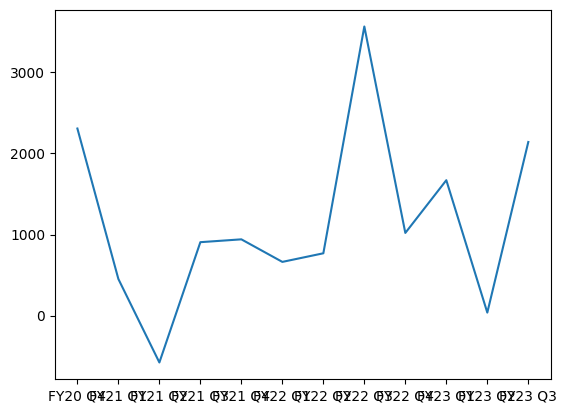

In [250]:
plt.plot(new_df['ROUTER 1'])

In [251]:
new_df.describe()

Product Name     ROUTER 1    TRANSCIEVER      SWITCH 1  ACCESS POINT 1  \
count           12.000000      12.000000     12.000000       12.000000   
mean          1157.920784  122524.416667   8789.343827    22345.017991   
std           1113.205519   42361.772764   5639.833596    49607.680830   
min           -576.981064   67132.000000   -776.034739   -62045.895841   
25%            610.239181   85981.750000   3780.993798    -5903.945018   
50%            923.500000  121250.500000   9413.000000    27802.500000   
75%           1787.750000  141763.250000  11707.250000    56335.750000   
max           3565.000000  208760.000000  17934.000000   109452.000000   

Product Name  ACCESS POINT 2      SWITCH 2      SWITCH 3  POWER SUPPLY 1  \
count              12.000000     12.000000     12.000000       12.000000   
mean            53926.179290  12330.166667  28642.250000   160901.333333   
std             31436.224547   2433.350658   9427.529071    41988.548946   
min             -9199.103099   8645.000000  10584.000000    98337.000000   
25%             33494.997882  10362.750000  21221.750000   131675.000000   
50%             53853.655824  12947.500000  29513.500000   166420.500000   
75%             81309.351695  14043.250000  33962.000000   194262.000000   
max             94777.073448  15831.000000  44724.000000   220386.000000   

Product Name     SWITCH 4     SWITCH 5      SWITCH 6  ACCESS POINT 3  \
count           12.000000    12.000000     12.000000       12.000000   
mean          3269.776889  5676.750000  13942.005269   134503.166667   
std           2354.809037  1345.455187  13602.307674    77876.137798   
min            177.000000  4100.000000    222.000000    51586.000000   
25%           2089.006679  4604.750000   4727.750000    67119.500000   
50%           2848.233100  5151.000000   8052.372327   113605.500000   
75%           4444.961892  6982.500000  20261.095874   210374.250000   
max           8063.000000  7894.000000  43287.567757   245803.000000   

Product Name  SUPERVISOR ENGINE      SWITCH 7  WIRELESS CONTROLLER  \
count                 12.000000     12.000000            12.000000   
mean               13105.788317  11188.500000          1720.416667   
std                15532.933441   6152.834461           519.862649   
min                   15.000000   5459.000000           963.000000   
25%                 2065.000000   6500.500000          1285.750000   
50%                 5752.047044  10573.000000          1678.500000   
75%                19278.915073  13862.000000          1960.000000   
max                48629.544593  27045.000000          2602.000000   

Product Name     SWITCH 8      SWITCH 9  ACCESS POINT 4     SWITCH 10  \
count           12.000000     12.000000       12.000000     12.000000   
mean          2103.166667   8263.916667    38682.899870  34920.281587   
std           1739.648127   3374.747518    14775.141133  19113.783522   
min             -4.000000   3788.000000    13260.000000   1227.000000   
25%            237.750000   5530.750000    28290.250000  22332.500000   
50%           2558.000000   7377.000000    40131.456582  39840.210084   
75%           3368.000000  11098.250000    48546.145684  47292.723040   
max           4343.000000  14980.000000    59241.055979  63058.327989   

Product Name  POWER SUPPLY 2  
count              12.000000  
mean            31513.000000  
std              9383.141284  
min             17799.000000  
25%             23982.250000  
50%             29870.000000  
75%             36510.000000  
max             47009.000000